## **DESAFIO**

Começar importando a base gerada pela IA

In [2]:
# IMPORT DATASET
import pandas as pd

df = pd.read_csv("Dataset/simulated_insurance_100k.csv", sep=",")  


Começar a explorar a base

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,56,female,35.40,4,no,southeast,10522.74
1,46,female,26.40,3,yes,northeast,23534.12
2,32,female,33.94,2,no,southwest,8923.73
3,60,male,28.50,2,no,southwest,8770.28
4,25,male,34.49,4,yes,northeast,22792.88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       100000 non-null  int64  
 1   sex       100000 non-null  object 
 2   bmi       100000 non-null  float64
 3   children  100000 non-null  int64  
 4   smoker    100000 non-null  object 
 5   region    100000 non-null  object 
 6   charges   100000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.3+ MB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Após identificar que não há nenhum valor nulo, isto é, não será necessário nenhum tratamento para inputar os dados nulos. Então seguiremos com a análise exploratória.

In [6]:
df.describe()

,age,bmi,children,charges
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.022480,30.023276,2.009370,11451.085065
std,13.526548,4.979519,1.414426,6185.665068
min,18.000000,7.720000,0.000000,2379.940000
25%,29.000000,26.670000,1.000000,7731.000000
50%,41.000000,30.010000,2.000000,8919.195000
75%,53.000000,33.380000,3.000000,10689.027500
max,64.000000,54.010000,4.000000,29429.090000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

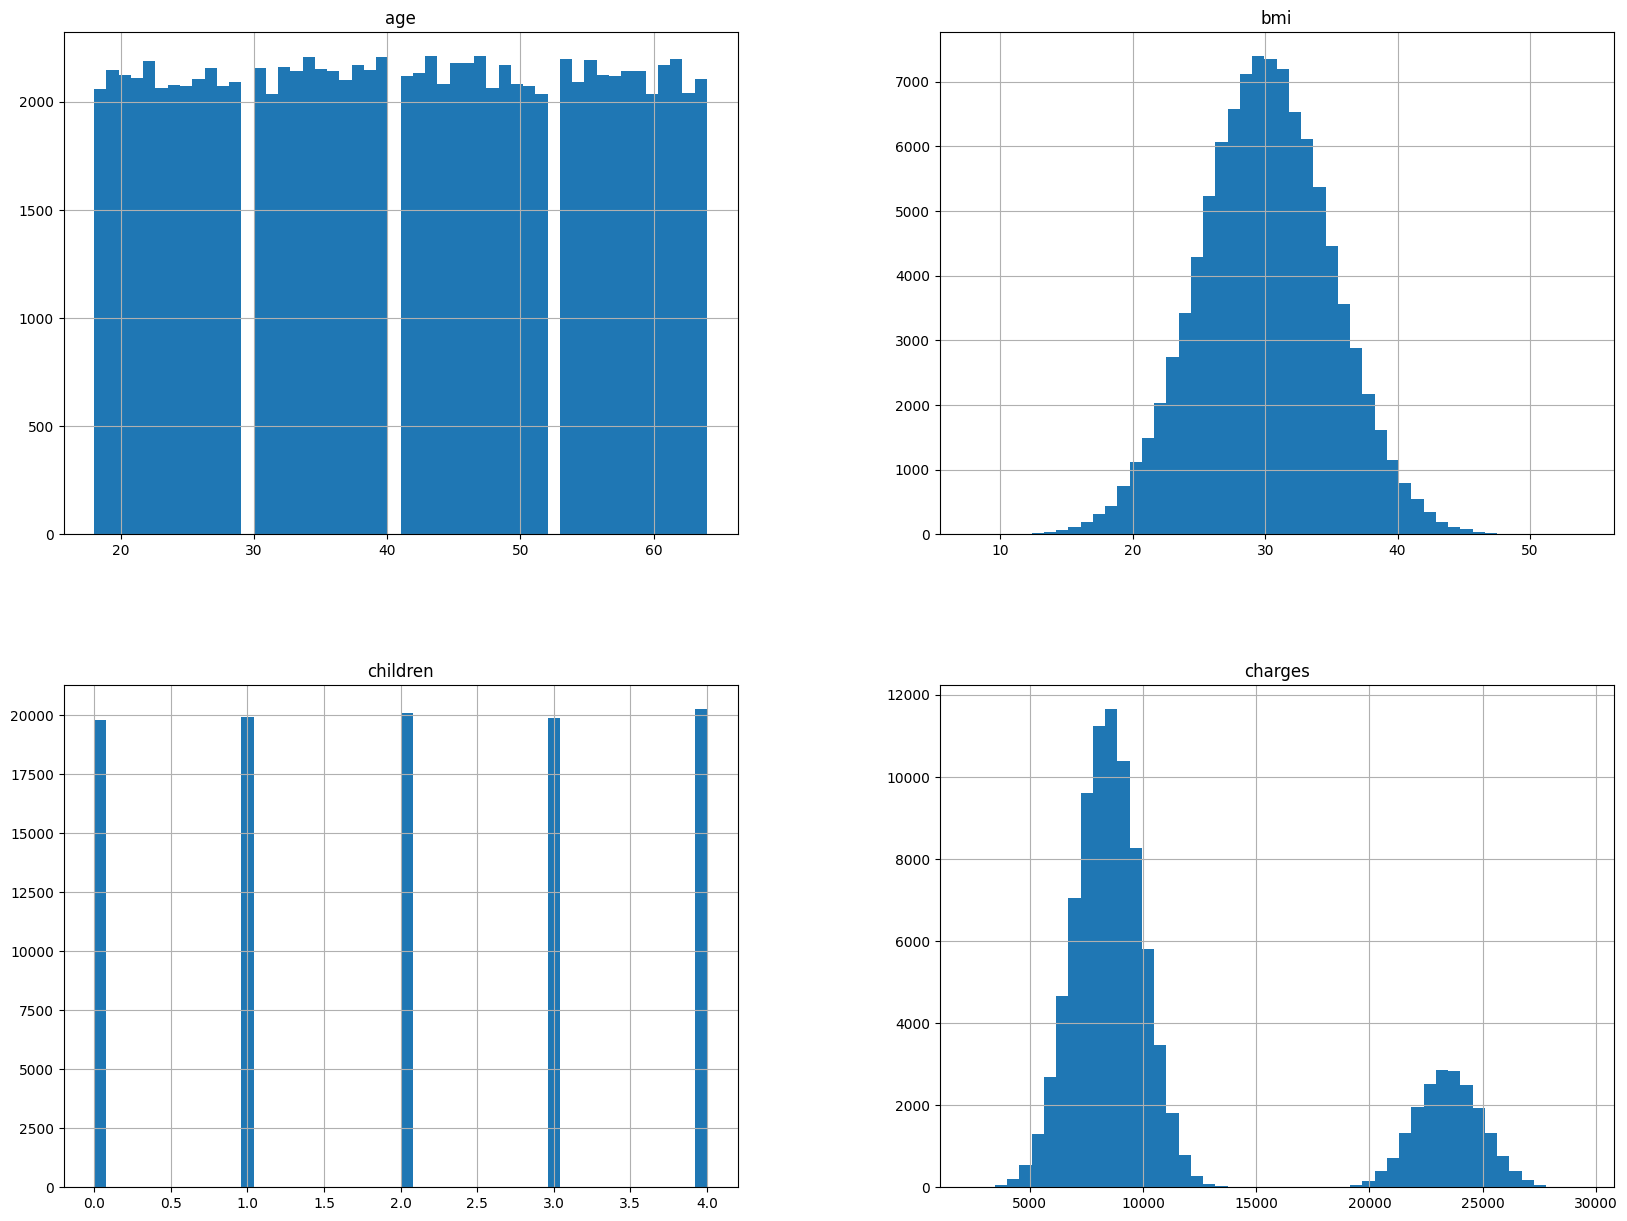

In [7]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

Agora vamos ver os boxplot dos nossos dados numericos

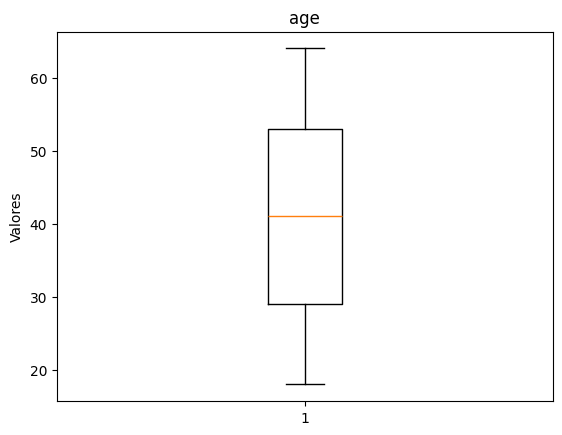

18
64


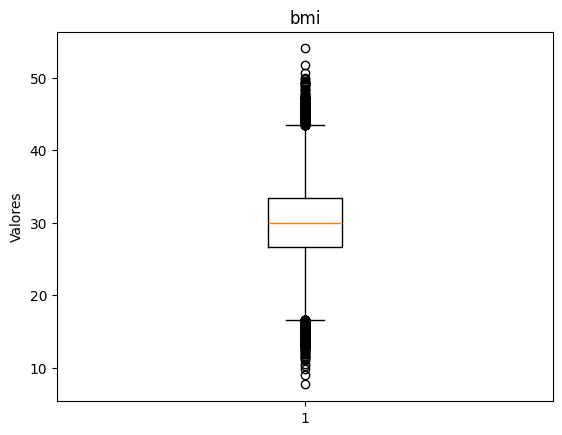

7.72
54.01


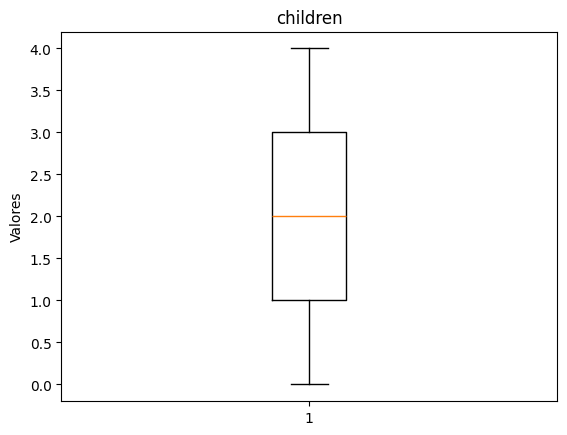

0
4


In [8]:
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot
plt.boxplot(df['age'])  
plt.title('age')
plt.ylabel('Valores')
plt.show()

print(df['age'].min())
print(df['age'].max())

plt.boxplot(df['bmi'])  
plt.title('bmi')
plt.ylabel('Valores')
plt.show()

print(df['bmi'].min())
print(df['bmi'].max())

plt.boxplot(df['children'])  
plt.title('children')
plt.ylabel('Valores')
plt.show()

print(df['children'].min())
print(df['children'].max())




Após análise dos dados numericos, podemos observar que no campo age uma característica interessante é apresentada: Ao que parece, não há indivíduos com as idades 29, 41 e 52. Vamo confirmar essa hipótese a seguir. Continuando a análise, para a coluna bmi podemos observar uma distribuição normal. O número de filhos está no universo dos inteiros, como esperado e vaiando entre 0 e 4. Os numeros fazem sentido, porém, a gente supõem que se os dados fossem reais e não gerados por IA poderiam ter indivíduos com mais de 4 filhos, levando em conta que seriam 100000 indivíduos analisados.

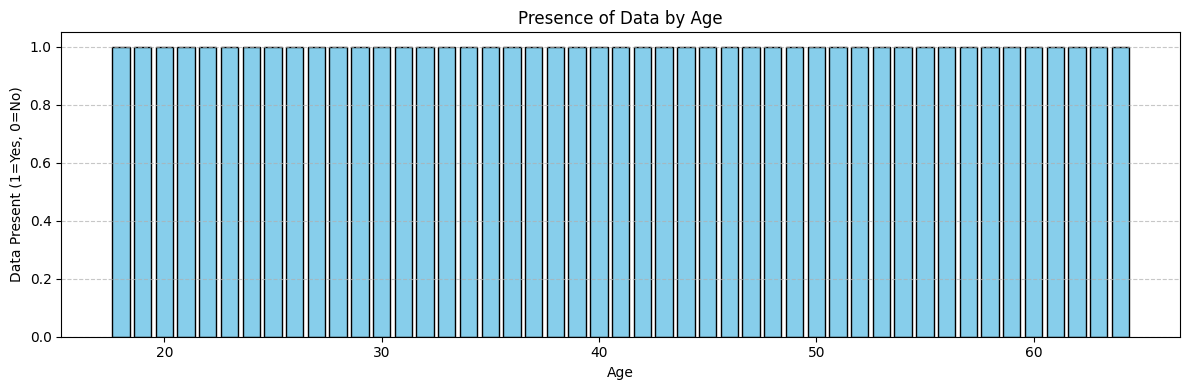

Missing ages: []


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the full age range
full_ages = pd.DataFrame({'age': range(df['age'].min(), df['age'].max() + 1)})

# Merge with the actual data to find missing ages
age_summary = full_ages.merge(df[['age']].drop_duplicates(), on='age', how='left', indicator=True)

# Plot
plt.figure(figsize=(12, 4))
plt.bar(age_summary['age'], age_summary['_merge'].eq('both').astype(int), color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Data Present (1=Yes, 0=No)')
plt.title('Presence of Data by Age')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print missing ages
missing_ages = age_summary[age_summary['_merge'] == 'left_only']['age'].tolist()
print("Missing ages:", missing_ages)

Como podemos observar, valeu a pena ir mais a fundo e verificar se existiam dados faltantes. Afinal, aprofundando as nossas análises, conseguimos perceber que a nossa hipotese não estava correta, pois existem dados para as idades 29, 41 e 52 sim. Mas por vias das dúvidas vamos verificar novamente, porém de outra maneira agora.

In [10]:
age29 = df[df['age'] == 29] 
print("Number of records with age 29:", age29)


Number of records with age 29:        age     sex    bmi  children smoker     region   charges
25      29  female  36.53         2    yes  northeast  23779.39
116     29    male  33.75         4     no  southwest   9810.45
199     29  female  35.48         0     no  northeast   6243.98
266     29    male  24.65         0    yes  northwest  20265.28
310     29    male  26.99         4     no  southeast   9104.40
...    ...     ...    ...       ...    ...        ...       ...
99863   29    male  22.87         4     no  northeast   6084.89
99885   29    male  27.31         2     no  northwest   8330.48
99915   29    male  27.16         4     no  northwest   8762.56
99972   29  female  32.73         0     no  southwest   8545.30
99980   29  female  22.84         1     no  southwest   5445.64

[2092 rows x 7 columns]


In [11]:
age41 = df[df['age'] == 41] 
print("Number of records with age 41:", age41)

Number of records with age 41:        age     sex    bmi  children smoker     region   charges
11      41    male  36.37         2     no  northwest   9383.61
14      41    male  25.83         3     no  southeast   8245.13
18      41    male  22.09         0     no  northeast   6141.94
85      41  female  29.33         4     no  northeast  10506.21
97      41  female  34.48         3     no  northwest  10307.34
...    ...     ...    ...       ...    ...        ...       ...
99719   41  female  32.81         4     no  southeast  11387.90
99756   41    male  25.19         0     no  northwest   7068.16
99799   41    male  24.32         0     no  northwest   7021.89
99860   41  female  36.57         4     no  southwest   9646.45
99924   41    male  38.49         2     no  southeast   9527.32

[2121 rows x 7 columns]


In [12]:
age52 = df[df['age'] == 52] 
print("Number of records with age 52:", age52)

Number of records with age 52:        age     sex    bmi  children smoker     region   charges
56      52    male  29.34         0     no  northeast   7082.36
105     52    male  25.17         3     no  northwest   6772.96
106     52  female  27.97         3     no  southeast   8191.66
122     52  female  29.95         1    yes  northeast  23859.93
127     52    male  36.18         1    yes  southeast  23053.97
...    ...     ...    ...       ...    ...        ...       ...
99626   52  female  32.23         0     no  northeast   7726.70
99657   52  female  33.59         3     no  southeast   8758.22
99692   52  female  31.40         1     no  northeast   8295.01
99816   52  female  29.97         1     no  southwest   7944.83
99981   52  female  26.84         2    yes  southwest  25242.89

[2037 rows x 7 columns]


Agora que já analisamos os dados numéricos, vamos começar a analisar os dados categóricos.

<Axes: xlabel='region'>

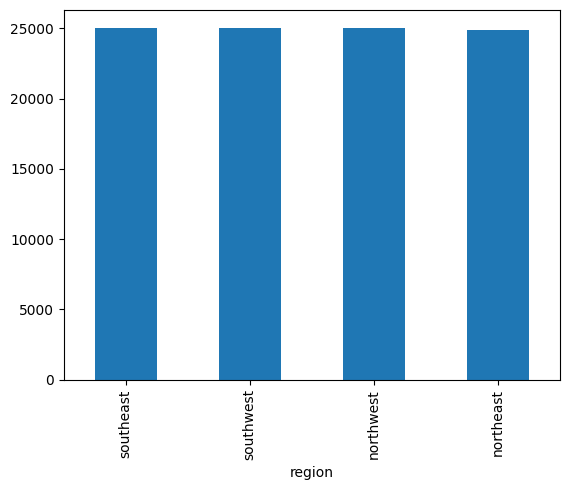

In [13]:
df['region'].value_counts().plot(kind='bar')

As amostras foram igualmente distribuídas entre as regiões southeast, southwest, northwest e northeast, sendo 25000 amostras para cada região. Uma característica que está meio artificial, provavelmente por ter sido gerado pela IA.

In [14]:
df['smoker'].value_counts()

smoker
no     80024
yes    19976
Name: count, dtype: int64

<Axes: ylabel='count'>

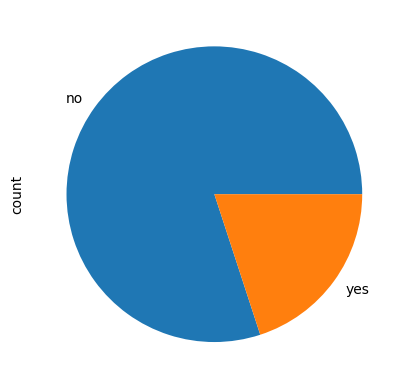

In [15]:
df['smoker'].value_counts().plot(kind='pie')

Entre fumantes e não fumantes, todos estão classificados corretamete entre yes or no, sendo que certa de 80% da base representa os não fumantes.

<Axes: ylabel='count'>

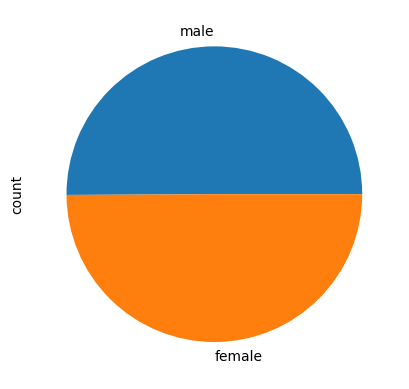

In [16]:
df['sex'].value_counts().plot(kind='pie')

In [17]:
# Identify column types
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

print('numeric dimensions',numeric_features)
print('categorical dimensions', categorical_features)

numeric dimensions ['age', 'bmi', 'children', 'charges']
categorical dimensions ['sex', 'smoker', 'region']


Após essa análise exploratória de dados, vamos começar o pré-processamento dos dados. Devemos converter os dados categoricos para numericos, usando um algum encoder. Tanto age, quanto region e sex nao possuem ordem intrinseca e por isso descartamos o Ordinal Encoder. Entre o LabelEncoder e OneHotEncoder, escolhemos o OneHotEncoder, pois, apesar da desvantagem de criar mais dimensões (uma para fumante, uma para nao fumante, uma para female, uma para male e uma para cada uma das 4 regioes) ainda assim, vale o preço de garantirmos que o modelo nao vai achar que uma regiao 4 é melhor do que a região 1, por exemplo. Além disso, vamos também normalizar os nossos dados numéricos. Como se trata de uma base que os dados estão bem distribuídos, o ideal é usarmos mesmo a normalização. Se tivessemos muitos outliers ou variáveis não muito bem distribuidas então poderíamos fazer uma padronização nos dados. 

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numeric_features),
        ("cat", OneHotEncoder(sparse_output=False), categorical_features)
    ]
)


In [20]:
baseFinal = preprocessor.fit_transform(df)
# baseFinal.shape
# Get names of numeric features (they stay the same)
num_features = numeric_features  # previously identified from X

# Get names of one-hot encoded features
cat_transformer = preprocessor.named_transformers_["cat"]
cat_feature_names = cat_transformer.get_feature_names_out(categorical_features)

# Combine all feature names
all_feature_names = list(num_features) + list(cat_feature_names)
all_feature_names

# turn baseFinal into a DataFrame
baseFinal = pd.DataFrame(baseFinal, columns=all_feature_names)
baseFinal

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.826087,0.597969,1.00,0.301037,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.608696,0.403543,0.75,0.782065,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.304348,0.566429,0.50,0.241922,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.913043,0.448909,0.50,0.236249,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.152174,0.578311,1.00,0.754661,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.565217,0.343271,0.50,0.669928,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
99996,0.478261,0.297256,1.00,0.237684,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
99997,0.478261,0.405055,0.50,0.755657,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
99998,0.630435,0.456470,0.00,0.196859,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Agora que terminamos o pré-processamento, vamos separar os dados de teste(20%) e de treinamento(80%)

In [21]:
# Separate features and target, and split into train and test sets
from sklearn.model_selection import train_test_split

X = baseFinal.drop("charges", axis=1)
Y = baseFinal["charges"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

Então agora podemos aplicar a regressão linear

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
lin_r2 = lin_reg.score(X_test, Y_test)  #r²:VARIANCIA EXPLICADA
lin_r2

0.9743876389778775

Bom, pela métrica do coeficiente de determinação, ou r², tivemos uma variancia explicada de aproximadamente 97.38%, o que quer dizer que o modelo explica 97.38% da variância no alvo (charges). Mas vamos avaliar o nosso modelo segundo outras metricas também: Erro Absoluto Médio (MAE), Erro Percentual Médio Absoluto (MAPE) e Raiz do Erro Quadrático Médio (RMSE).

MSE e MRSE

In [23]:
# MSE
import numpy as np
from sklearn.metrics import mean_squared_error
# erro médio quadrático eleva ao quadrado a média do erro médio absoluto. Estou avaliando se os erros não são tão grandes, esses erros são penalizados.
# penaliza muito mais valores distantes da média.
final_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(Y_test, final_predictions) #erro quadratico medio
lin_rmse = np.sqrt(lin_mse) # raiz quadrada 
lin_rmse

0.03686656238690457

O RMSE de aproximademente 3.7% é um valor que julgamos bom, pois é uma baixa quantidade de grandes erros.

In [24]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Y_test, final_predictions)
lin_mae

0.029397947583175283

E o MAE também é um valor baixo, o que valida a qualidade do modelo também.

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, final_predictions)
print('r²',r2)

r² 0.9743876389778775


In [26]:
# Função para calcular o MAPE (Mean Absolute Percentage Error)
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [27]:
# Calcular o MAPE
mape_result = calculate_mape(Y_test, final_predictions)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 12.48%


Um MAPE de 12,71% significa que, em média, as previsões desse modelo de regressão erram 12,71% em relação aos valores reais. Por exemplo, para um valor real de 1000, o modelo estaria prevendo algo entre 872,9 e 1127,1.

O Modelo de Regressão Linear se adequou muito bem para essa base de dados. Contudo, podemos testar o desempenho de outros algoritmos como KNN regression e Decision Tree Regression para fazer uma melhor tomada de decisão.

In [28]:
from sklearn.neighbors import KNeighborsRegressor 
maior =0;
indice=0;
for i in range(1, 15, 2):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, Y_train)
    ve = knn.score(X_test, Y_test)
    print("k:", i, "R²:", ve )   
    if ve > maior:
        maior = ve
        indice = i

k: 1 R²: 0.9486861746757163
k: 3 R²: 0.9658683535891935
k: 5 R²: 0.9688628059336634
k: 7 R²: 0.9703159814695176
k: 9 R²: 0.9711989105488944
k: 11 R²: 0.971654631274904
k: 13 R²: 0.972016724943636


In [29]:
print("Maior R²:", maior)
print("Melhor k", indice)

Maior R²: 0.972016724943636
Melhor k 13


In [30]:
knn = KNeighborsRegressor(n_neighbors=indice)
knn.fit(X_train, Y_train)
knn_r2 = knn.score(X_test, Y_test)
knn_r2

0.972016724943636

In [31]:
final_predictions_knn = knn.predict(X_test)
knn_mse = mean_squared_error(Y_test, final_predictions_knn) #erro quadratico medio
knn_rmse = np.sqrt(knn_mse) # raiz quadrada 
knn_rmse

0.03853515472140392

In [32]:
knn_mae = mean_absolute_error(Y_test, final_predictions_knn)
knn_mae

0.03078059960507788

In [33]:
results = {
    'Model': ['Linear Regression', 'KNN'],
    'R²': [lin_r2, knn_r2],
    'RMSE': [lin_rmse, knn_rmse],
    'MAE': [lin_mae, knn_mae]
}

df_results = pd.DataFrame(results)
print(df_results)


               Model        R²      RMSE       MAE
0  Linear Regression  0.974388  0.036867  0.029398
1                KNN  0.972017  0.038535  0.030781
